# Yedgaon Discharge Prediction

#### Brief: 
The present work aims at developing a model for reservoir operation using Machine Learning tools in the Kukadi project of Maharashtra State, India. In this study, the data sets at five different stations located in Kukadi Project are used. Kukadi Irrigation Project envisages cluster of 5 major dams (named Dimbhe, Manikdoh, Wadaj, Pimplgaojoge and Yedgaon) having irrigation potential of 155056 Ha with annual 943.98 Mm3 (33.33 TMC) water utilization. The Yedgaon dam is like pick up weir having its own yield and storage. It receives water from Dimbhe (though DLBC), Wadaj (through MLBC), Manikdoh (through river) and through Pimpalgaojoge (through river).

#### Problem Statement: 
The aim of the present work is develop a model to estimate the discharge at Manikdoh, Wadaj, Dimbhe and Pimpalgaojoge dams to estimate the same at Yedgaon and analyze the results

#### Objective: 
Development of model using the discharge values at upstream (Manikdoh, Wadaj, Dimbhe, Pimpalgaojoge) stations and downstream (Yedgaon) station.
Comparison of the results using various soft computing tools i.e. actual values and predicted values at Yedgaon dam.


#### Dataset: 
Daily Discharge Data values was obtained from the Irrigation Department, Narayangaon from 1st June 2015 to 31st August 2019 each for Manikdoh, Dimbhe, Wadaj, Pimplgaojoge and Yedgaon for Kukadi Irrigation Project. 
The total no. of observations for daily discharge data available for each station is 592.

#### Methodology:
The project follows the process: Data Gathering, Exploratory Data Analysis, Feature Engineering and finally Machine Learning. The model is developed using Linear Regression, Decision Tree Regressor, KNN Regression, Support Vector Machine and Random Forest. Further, Concluding by the results in terms of R2.

# Importing Libraries

In [161]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Reading the data

In [162]:
import pandas as pd
data = pd.read_csv('Discharge Data.csv')

In [163]:
data.head()

,Manikdoh,Wadaj,Dimbhe,Pjoge,Yedgaon
0,0,0,300,0,515
1,0,0,500,0,1306
2,0,0,550,0,1400
3,0,0,600,0,1405
4,0,0,650,0,1400


# Preliminary Investigation

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Manikdoh  592 non-null    int64
 1   Wadaj     592 non-null    int64
 2   Dimbhe    592 non-null    int64
 3   Pjoge     592 non-null    int64
 4   Yedgaon   592 non-null    int64
dtypes: int64(5)
memory usage: 23.2 KB


In [165]:
data.shape

(592, 5)

In [166]:
data.describe()

,Manikdoh,Wadaj,Dimbhe,Pjoge,Yedgaon
count,592.000000,592.000000,592.000000,592.000000,592.000000
mean,276.081081,69.302365,479.797297,257.743243,1444.858108
std,456.299965,97.774672,192.400570,452.092767,881.017156
min,0.000000,0.000000,0.000000,0.000000,138.000000
25%,0.000000,0.000000,500.000000,0.000000,1303.000000
50%,0.000000,0.000000,550.000000,0.000000,1400.000000
75%,600.000000,130.250000,600.000000,400.000000,1417.000000
max,1250.000000,364.000000,650.000000,1450.000000,11966.000000


In [167]:
data.isnull().sum()

Manikdoh    0
Wadaj       0
Dimbhe      0
Pjoge       0
Yedgaon     0
dtype: int64

In [168]:
data.dtypes

Manikdoh    int64
Wadaj       int64
Dimbhe      int64
Pjoge       int64
Yedgaon     int64
dtype: object

In [169]:
data = data.drop_duplicates()

In [170]:
data.shape

(464, 5)

# Exploratory Data Analysis

In [171]:
import matplotlib.pyplot as plt

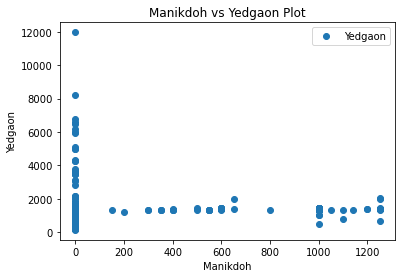

In [172]:
data.plot(x='Manikdoh', y='Yedgaon', style='o')
plt.title('Manikdoh vs Yedgaon Plot')
plt.xlabel('Manikdoh')
plt.ylabel('Yedgaon')
plt.show()

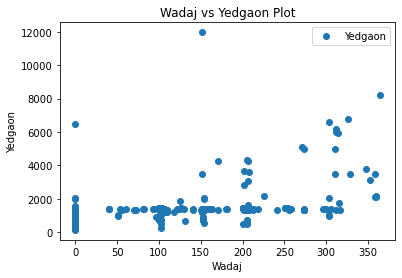

In [173]:
data.plot(x='Wadaj', y='Yedgaon', style='o')
plt.title('Wadaj vs Yedgaon Plot')
plt.xlabel('Wadaj')
plt.ylabel('Yedgaon')
plt.show()

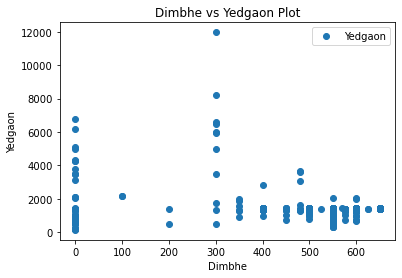

In [174]:
data.plot(x='Dimbhe', y='Yedgaon', style='o')
plt.title('Dimbhe vs Yedgaon Plot')
plt.xlabel('Dimbhe')
plt.ylabel('Yedgaon')
plt.show()

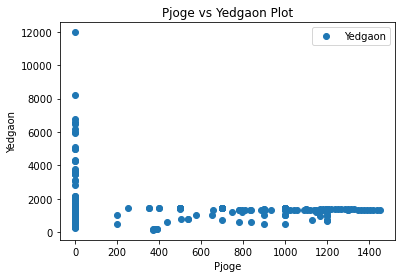

In [175]:
data.plot(x='Pjoge', y='Yedgaon', style='o')
plt.title('Pjoge vs Yedgaon Plot')
plt.xlabel('Pjoge')
plt.ylabel('Yedgaon')
plt.show()

In [176]:
data.corr()

,Manikdoh,Wadaj,Dimbhe,Pjoge,Yedgaon
Manikdoh,1.000000,-0.124813,0.210782,-0.189980,-0.055177
Wadaj,-0.124813,1.000000,-0.293191,-0.357677,0.371903
Dimbhe,0.210782,-0.293191,1.000000,0.057376,-0.203798
Pjoge,-0.189980,-0.357677,0.057376,1.000000,-0.131617
Yedgaon,-0.055177,0.371903,-0.203798,-0.131617,1.000000


In [177]:
data.columns

Index(['Manikdoh', 'Wadaj', 'Dimbhe', 'Pjoge', 'Yedgaon'], dtype='object')

# Train Test Split

In [178]:
X = data[['Wadaj', 'Dimbhe', 'Pjoge']].values #array of features
y = data['Yedgaon'].values #array of targets

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [180]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [181]:
X_train.shape, X_test.shape

((371, 3), (93, 3))

In [182]:
y_train.shape, y_test.shape

((371,), (93,))

# Model Development

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

### 1. Linear Regression

In [184]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [185]:
coeff_df = pd.DataFrame(regressor.coef_,['Wadaj', 'Dimbhe', 'Pjoge'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Wadaj,353.504746
Dimbhe,-51.810901
Pjoge,-4.136448


In [186]:
regressor.intercept_

1449.7358490566037

In [187]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,741,1491.471260
1,1452,1130.076359
2,1300,1143.405035
3,1300,1122.678043
4,1382,1143.405035
...,...,...
88,1322,1132.785443
89,1410,1132.785443
90,1303,1127.112266
91,1357,1863.902120


In [188]:
df.corr()

,Actual,Predicted
Actual,1.000000,0.406655
Predicted,0.406655,1.000000


In [189]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.1494210754047477


# Feature Selection

In [190]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Wadaj', 'Dimbhe', 'Pjoge'],selector.support_))

[('Wadaj', True), ('Dimbhe', True), ('Pjoge', True)]

# Cross Validation

In [191]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

In [192]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

-1.4861902026635005

### 2. Decision Tree Regressor

In [193]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor()

# Fit dt to the training set
dt.fit(X_train, y_train)
dt.predict(X_test)

array([ 1087.5       ,  1418.61538462,  1181.62162162,  1200.        ,
        1181.62162162,  1419.27777778,  1300.        ,  1394.33333333,
        1453.        ,  1418.61538462,  1181.62162162,  1176.        ,
        1404.        ,  1407.        ,   705.        ,  1416.        ,
        1378.        ,  1306.        ,  1455.33333333,  1380.        ,
        1306.        ,  1176.        ,  1006.        ,  1452.        ,
        1405.5       ,  1435.        ,  1181.62162162,  4975.        ,
        1373.        ,  1181.62162162,  1300.        ,  1428.        ,
        1181.62162162,   515.        ,  1309.        ,  1405.        ,
         848.8       ,  1405.5       ,  1300.        ,  1001.        ,
         848.8       ,   214.        ,  1181.62162162,  1153.4       ,
        1372.        ,  1181.62162162,  1336.6       ,  1203.2       ,
        1452.        ,  1405.5       ,  1306.        ,  1371.        ,
        3465.        ,  1200.        ,   972.33333333,  1418.61538462,
      

In [194]:
from sklearn.metrics import  r2_score

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
rsquared = r2_score(y_test,y_pred)
# Compute rmse_dt


# Print rmse_dt
print("Test set R2 of dt: {:.2f}".format(rsquared))

Test set R2 of dt: -0.82


- Inference: The model built on Decision Tree Regressor Analysis gives an accuracy of 82%

### 3. KNN Regression

In [195]:
for i in range(5,150):
    KN = KNeighborsRegressor(n_neighbors = i)
    KN.fit(X_train, y_train)
    print("Training for {}th Neighbor: ".format(i), KN.score(X_test,y_test))

Training for 5th Neighbor:  0.20884403102197546
Training for 6th Neighbor:  0.21984896559410227
Training for 7th Neighbor:  0.2268567749021383
Training for 8th Neighbor:  0.22355978592499492
Training for 9th Neighbor:  0.2528555114969062
Training for 10th Neighbor:  0.2592293758201898
Training for 11th Neighbor:  0.24044169864901221
Training for 12th Neighbor:  0.23585644764249414
Training for 13th Neighbor:  0.2506572852170641
Training for 14th Neighbor:  0.23488989670424487
Training for 15th Neighbor:  0.2503431372092041
Training for 16th Neighbor:  0.33925505162416447
Training for 17th Neighbor:  0.33527917044818556
Training for 18th Neighbor:  0.32847239403884276
Training for 19th Neighbor:  0.3155947531874119
Training for 20th Neighbor:  0.3013502956708821
Training for 21th Neighbor:  0.2804077013530626
Training for 22th Neighbor:  0.26786281926239863
Training for 23th Neighbor:  0.28107082027950336
Training for 24th Neighbor:  0.2753238723024214
Training for 25th Neighbor:  0.272

- Inference: The model built on KNN Regression Analysis gives an accuracy of 20.88%

### 4. Support Vector Machine

In [196]:
for k in np.arange(0.01,5,0.5):
    SV = SVR(C=k, gamma = 'auto')
    SV.fit(X_train,y_train)
    print("for c = ", k)
    print("Training Score: ", SV.score(X_train, y_train))
    print("Testing Score: ", SV.score(X_test, y_test))

for c =  0.01
Training Score:  -0.004299242530833913
Testing Score:  -0.03769318115929021
for c =  0.51
Training Score:  -0.0031262145390085205
Testing Score:  -0.036018012902639285
for c =  1.01
Training Score:  -0.003253794778353969
Testing Score:  -0.037750431714060007
for c =  1.51
Training Score:  -0.0030067842976309045
Testing Score:  -0.038452812014314386
for c =  2.01
Training Score:  -0.0025851680767987606
Testing Score:  -0.038591027110863596
for c =  2.51
Training Score:  -0.0021666737510814826
Testing Score:  -0.038726139029475526
for c =  3.01
Training Score:  -0.0017759100307885856
Testing Score:  -0.03891724975342847
for c =  3.51
Training Score:  -0.0013553382072097886
Testing Score:  -0.039024811669111426
for c =  4.01
Training Score:  -0.0009654224803627987
Testing Score:  -0.039214870081165865
for c =  4.51
Training Score:  -0.0006139371334366039
Testing Score:  -0.03943490524095106


Inference: The model built on Support Vector Machine Analysis gives an accuracy of 3.769%

### 5. Random Forest

In [197]:
dict = {}
for i in range(3,15):
    rf = RandomForestRegressor(max_depth = i)
    rf.fit(X_train, y_train)
    dict[i] = {'tr': rf.score(X_train, y_train), 'te':rf.score(X_test, y_test)}
    print("for max depth = ", i)
    print("Training score: ", rf.score(X_train, y_train))
    print("Testing score: ", rf.score(X_test, y_test))

for max depth =  3
Training score:  0.5031979897684788
Testing score:  0.25078090386097585
for max depth =  4
Training score:  0.7092178049719164
Testing score:  0.08704447951513083
for max depth =  5
Training score:  0.6998401929207128
Testing score:  0.1898035382493808
for max depth =  6
Training score:  0.7298424858425395
Testing score:  0.23944235719933837
for max depth =  7
Training score:  0.7521642888328838
Testing score:  0.15737237135316307
for max depth =  8
Training score:  0.7860852274389607
Testing score:  0.24594097618873212
for max depth =  9
Training score:  0.7796382680583278
Testing score:  0.16685871985881284
for max depth =  10
Training score:  0.7693060395390381
Testing score:  0.2328684785879076
for max depth =  11
Training score:  0.7952178910160129
Testing score:  0.20541401796771852
for max depth =  12
Training score:  0.7729192769960057
Testing score:  0.16578558163727286
for max depth =  13
Training score:  0.7872740441347104
Testing score:  0.144195270085083

- Inference: The model built on Random Forest Analysis gives an accuracy of 24.57%

# Conclusion

- Considering all the accuracy values given by all the five models, it is observed that Decision Tree Regression Model performed with the best accuracy of 82 %.